In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

In [196]:
# Loading the Iris dataset into a variable named 'iris'
iris = load_iris()

In [152]:
print(type(iris))

<class 'sklearn.utils._bunch.Bunch'>


In [197]:
# Accessing the feature names of the Iris dataset
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [198]:
# Accessing the target names of the Iris dataset
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Converting into panda dataframe

In [199]:
# Creating a DataFrame 'df' using the Iris dataset features as data and feature names as column names
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Displaying the first few rows of the DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [156]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [157]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [158]:
df['target']=iris.target

In [159]:
df['target'].unique()

array([0, 1, 2])

In [160]:
df[df['target']==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [161]:
df[df['target']==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [162]:
df[df['target']==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [163]:
df['flower_name']=df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [164]:
df[df['target']==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [165]:
df[df['target']==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


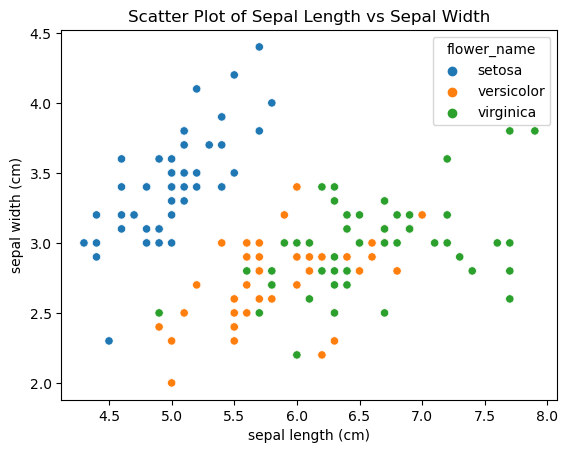

In [166]:
#scatter plot
sns.scatterplot(data=df,x='sepal length (cm)',y='sepal width (cm)',hue='flower_name')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.show()

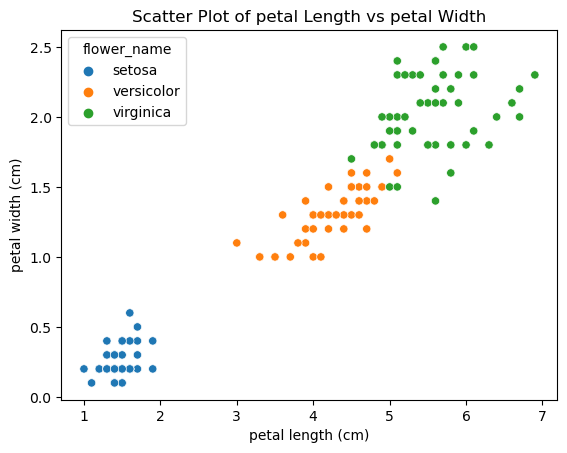

In [167]:
#Scatter plot
sns.scatterplot(data=df,x='petal length (cm)',y='petal width (cm)',hue='flower_name')
plt.title('Scatter Plot of petal Length vs petal Width')
plt.show()

## Building KNN from scratch

In [188]:
# Defining a class named KNN
class KNN:
    # Constructor to initialize the class with a parameter k (number of neighbors)
    def __init__(self, k=3):
        self.k = k

    # Method to fit the model, storing training data
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    # Method to make predictions on new data
    def predict(self, X):
        # For each data point in X, predict the label
        predictions = [self._predict(x) for x in X.values]
        return np.array(predictions)

    # Method to calculate the accuracy of the model
    def score(self, X_test, y_test):
        # Make predictions on the test data
        predictions = self.predict(X_test)
        # Calculate accuracy by comparing predicted labels to actual labels
        accuracy = np.sum(predictions == y_test) / len(y_test)
        return accuracy

    # Helper method to predict the label of a single data point
    def _predict(self, x):
        # Calculate distances from the input data point to all training data points
        distances = [np.sqrt(np.sum((x - x_train) ** 2)) for x_train in self.X_train.values]
        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Get labels of k nearest neighbors
        k_nearest_labels = [self.y_train.iloc[i] for i in k_indices]
        # Find the most common label among the k nearest neighbors
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


In [170]:
X= df.drop(['target','flower_name'],axis=1)
y=df['target']

In [171]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [172]:
X.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [173]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [174]:
X.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [175]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [176]:
X.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [100]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(len(X_train))
print(len(X_test))

120
30


In [178]:
X_train.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [179]:
X_train['petal length (cm)'].unique()

array([4.6, 6.1, 3.9, 5.6, 5.1, 1.5, 4. , 1.4, 5.8, 5.5, 5. , 6.9, 1.7,
       1.3, 6.7, 5.4, 6.3, 4.8, 4.5, 4.2, 1.6, 4.9, 4.4, 5.7, 4.3, 3.3,
       6. , 5.3, 4.1, 6.6, 5.2, 3.6, 3.8, 1.9, 5.9, 1.1, 3.7, 3.5, 1. ,
       4.7])

In [119]:
y_train.dtypes

dtype('int64')

In [189]:
knn = KNN(k=9)
knn.fit(X_train, y_train)

In [190]:
X_test.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [191]:
predictions=knn.predict(X_test)


In [192]:
# Convert new data into a pandas DataFrame
new_data = pd.DataFrame([[7.9, 3.8, 6.4, 2.0]], columns=iris.feature_names)
prd=model.predict(new_data)

In [193]:
prd

array([2])

In [194]:
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.975
0.9666666666666667


In [185]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


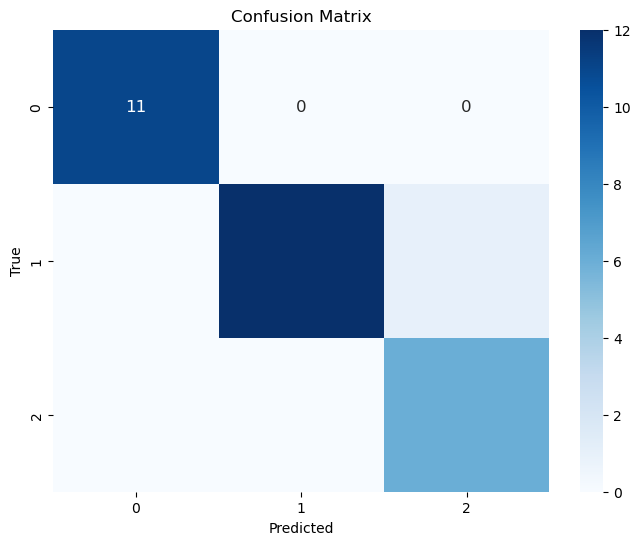

In [186]:
# Print confusion matrix to inspect values
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [148]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

